# Ensemble of Regression Trees

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
# RandomForestRegressor is for Bagging and Random Forest regression models

In [25]:
boston_df = pd.read_csv('Boston.csv')
boston_df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
boston_df.shape

(506, 14)

In [27]:
X = boston_df.drop('medv',axis =1)
y = boston_df.medv

#### Single Tree

In [28]:
X_train,X_test,y_train,y_test =\
train_test_split(X,y,train_size=0.5,random_state=0)

In [29]:
tree1 = DecisionTreeRegressor(max_depth=4)
tree1.fit(X_train,y_train)
pred1 = tree1.predict(X_test)
mspe = mean_squared_error(y_test,pred1)
mspe

23.81737151382862

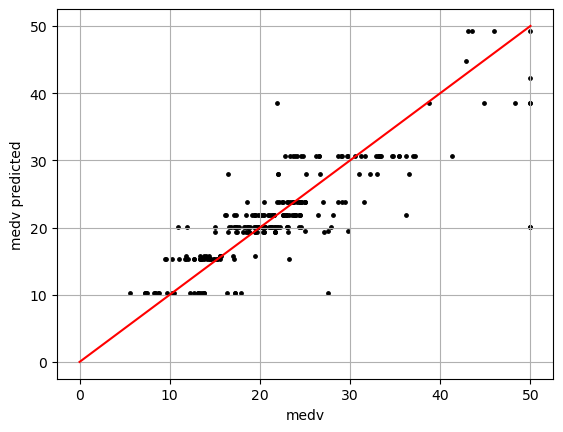

In [30]:
xaxis = np.linspace(0,50,100)
plt.scatter(y_test,pred1,s = 6,color='k')
plt.plot(xaxis,xaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

## Bagging on B=500 Regression Trees

All p=13 predictors will be considered at each split of the tree<br>
m = max_features = n. of predictors = p

In [31]:
bag500 = RandomForestRegressor(max_features=13,max_depth=4,
                               n_estimators = 500,random_state=1)
bag500.fit(X_train,y_train);
pred2 = bag500.predict(X_test)
mean_squared_error(y_test,pred2)

17.511475948091437

In [32]:
# significantly lower than that of a single tree

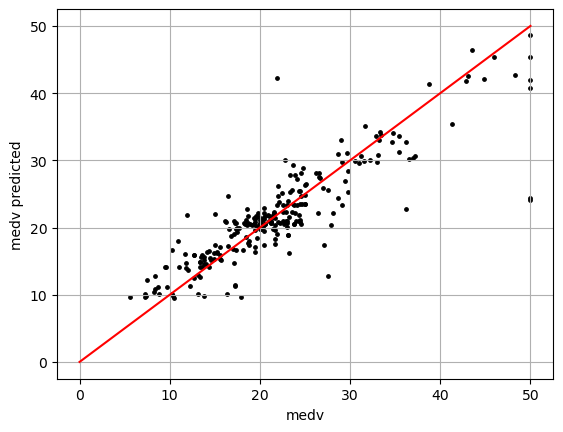

In [33]:
plt.scatter(y_test,pred2,s = 6,color='k')
plt.plot(xaxis,xaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

In [34]:
# Comparison plot 1

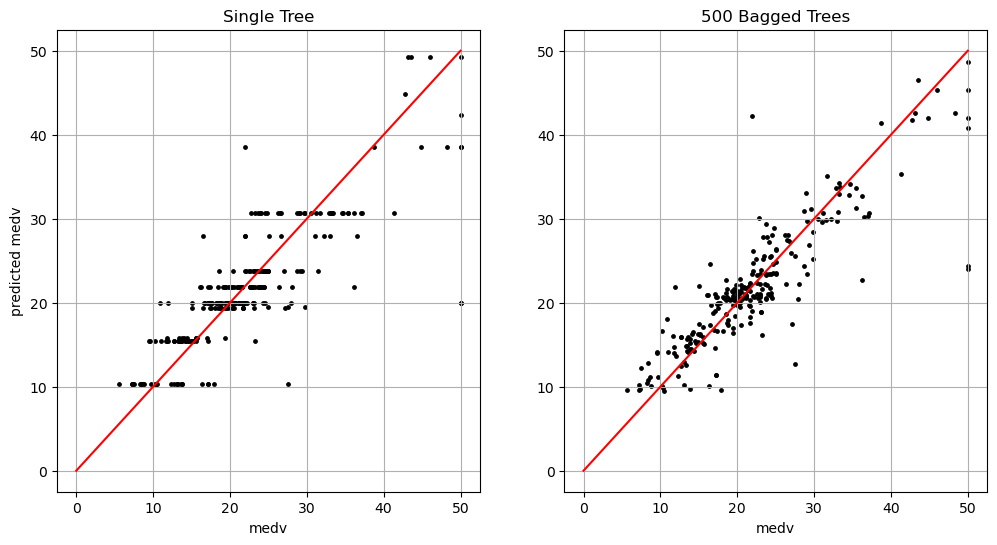

In [35]:
figure,(ax0,ax1) = plt.subplots(ncols = 2,figsize=(12,6))
# single tree plot
ax0.scatter(y_test,pred1,s = 6,color='k')
ax0.plot(xaxis,xaxis,color='r')
ax0.set_xlabel('medv')
ax0.set_ylabel('predicted medv')
ax0.title.set_text('Single Tree')
ax0.grid()
# bagging plot
ax1.scatter(y_test,pred2,s = 6,color='k')
ax1.plot(xaxis,xaxis,color='r')
ax1.set_xlabel('medv')
ax1.title.set_text('500 Bagged Trees')
ax1.grid()

### Find best n_estimators (holdout cv)

In [36]:
X_nontest,X_test,y_nontest,y_test = train_test_split(X,y,test_size=0.5,
                                                 random_state=0)

In [37]:
X_train,X_validation,y_train,y_validation = train_test_split(X_nontest,y_nontest,
                                                 train_size=0.5,
                                                 random_state=0)

In [38]:
nn = range(25,1100,50)

mses = []
for k in nn:
    model = RandomForestRegressor(max_features=13,max_depth=4,
                                      n_estimators = k,
                                      random_state=1)
    model.fit(X_train,y_train);
    yhat = model.predict(X_validation)
    mse = mean_squared_error(y_validation,yhat)
    mses.append(mse)

In [39]:
df = pd.DataFrame(mses,columns = ['Valid_MSE'])
df.index = nn
df.columns.name = 'n_estimators'
df

n_estimators,Valid_MSE
25,13.790862
75,12.680501
125,12.823402
175,12.472117
225,12.431220
275,12.537799
325,12.465000
375,12.392024
425,12.286661
475,12.361468


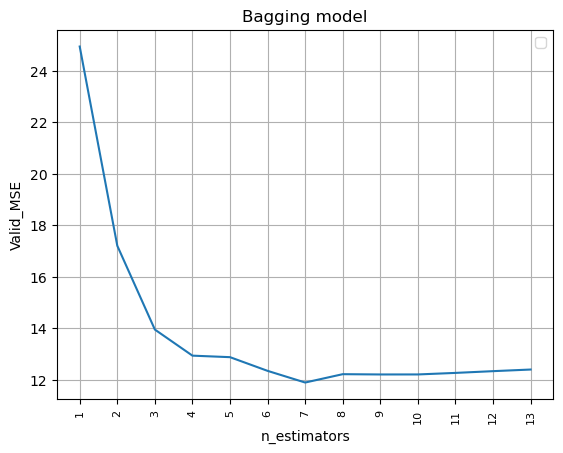

In [64]:
df.plot(xlabel = 'n_estimators',ylabel='Valid_MSE')
plt.xticks(nn, fontsize=8, rotation=90)
plt.title('Bagging model')
plt.legend('')
plt.grid();

In [41]:
df[df['Valid_MSE'] == df['Valid_MSE'].min()]

n_estimators,Valid_MSE
925,12.189376


### Test MSE

In [42]:
bagging_model =\
RandomForestRegressor(max_features=13, 
                      max_depth=4,
                      n_estimators = 500,
                      random_state=1)
bagging_model.fit(X_nontest,y_nontest);
yhat = bagging_model.predict(X_test)
mean_squared_error(y_test,yhat)

17.511475948091437

### importance of each predictor

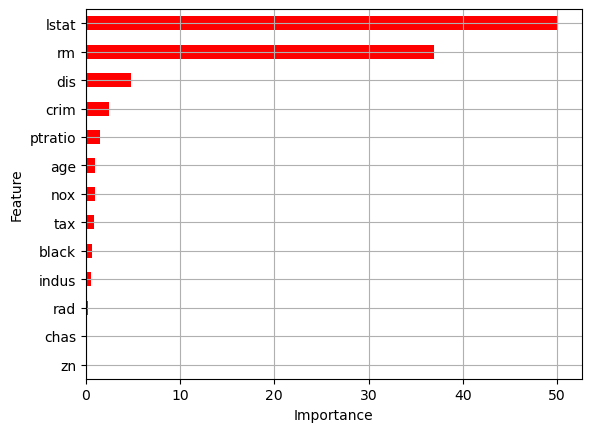

In [43]:
Importance = pd.DataFrame({'Importance':bagging_model.feature_importances_*100},
                          index = X.columns)
df8 = Importance.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df8.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

The wealth level of the community ('lstat') and the house size ('rm')
are the two most important predictors

## Random Forest on Regression Trees (500 trees)

Not all 13 predictors will be considered at each split<br>
m = max_features m < n. predictors p<br>
I will use m = 6

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=0)

In [45]:
forest1 = RandomForestRegressor(max_features = 6,max_depth = 4,
                                n_estimators = 500,random_state = 1)
forest1.fit(X_train,y_train)
pred = forest1.predict(X_test)
mean_squared_error(y_test,pred)

17.434233348241854

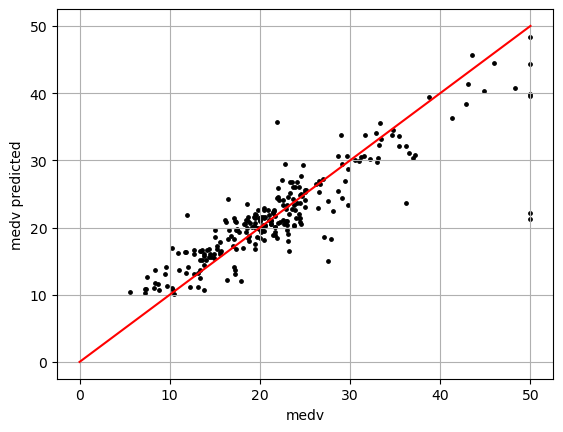

In [46]:
xaxis = np.linspace(0,50,100)
plt.scatter(y_test,pred,s = 6,color='k')
plt.plot(xaxis,xaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

In [47]:
# Comparison plot 2

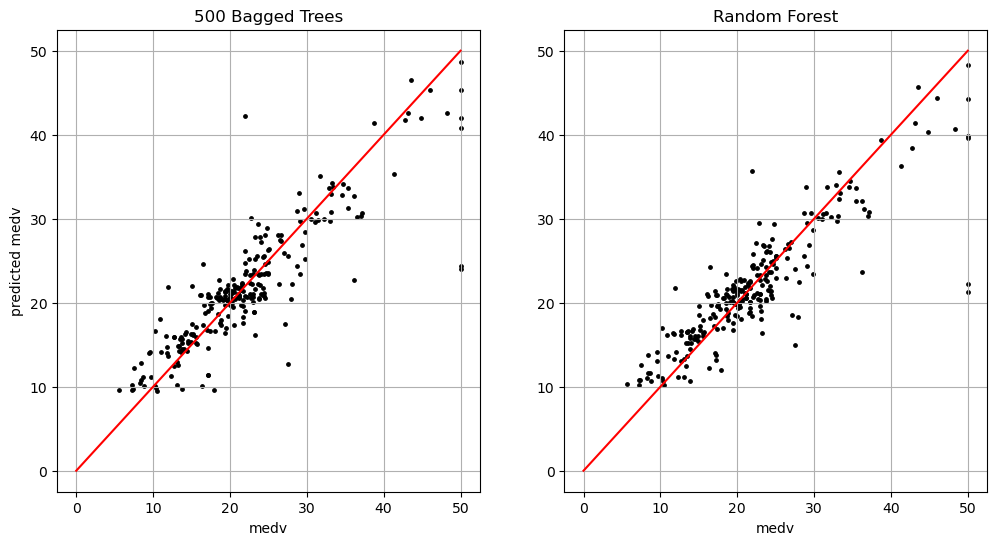

In [48]:
figure,(ax0,ax1) = plt.subplots(ncols = 2,figsize=(12,6))
# single tree plot
ax0.scatter(y_test,pred2,s = 6,color='k')
ax0.plot(xaxis,xaxis,color='r')
ax0.set_xlabel('medv')
ax0.set_ylabel('predicted medv')
ax0.title.set_text('500 Bagged Trees')
ax0.grid()
# bagging plot
ax1.scatter(y_test,pred,s = 6,color='k')
ax1.plot(xaxis,xaxis,color='r')
ax1.set_xlabel('medv')
ax1.title.set_text('Random Forest')
ax1.grid()

### Find best max_features (holdout cv)

In [50]:
X_nontest,X_test,y_nontest,y_test = train_test_split(X,y,test_size=0.5,
                                                 random_state=0)

In [51]:
X_train,X_validation,y_train,y_validation = train_test_split(X_nontest,y_nontest,
                                                 train_size=0.5,
                                                 random_state=0)

In [52]:
nn = range(1,14)

mses = []
for k in nn:
    model = RandomForestRegressor(max_features=k,max_depth=4,
                                      n_estimators = 500,
                                      random_state=1)
    model.fit(X_train,y_train)
    yhat = model.predict(X_validation)
    mse = mean_squared_error(y_validation,yhat)
    mses.append(mse)

In [53]:
df = pd.DataFrame(mses,columns = ['Valid_MSE'])
df.index = nn
df.columns.name = 'max_features'
df

max_features,Valid_MSE
1,24.939713
2,17.200655
3,13.943997
4,12.930648
5,12.871667
6,12.339600
7,11.886289
8,12.210822
9,12.199773
10,12.200606


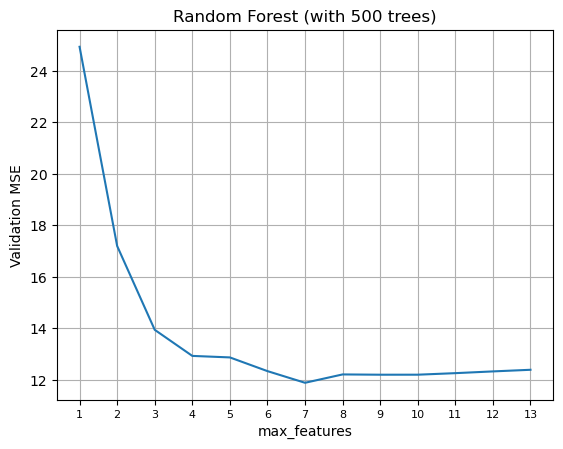

In [65]:
df.plot(xlabel='max_features',ylabel='Validation MSE',legend = None)
plt.xticks(nn, fontsize=8, rotation=0)
plt.title('Random Forest (with 500 trees)')
plt.grid();

In [35]:
df[df['Valid_MSE'] == df['Valid_MSE'].min()]

,Valid_MSE
max_features,
7,11.886289


In [36]:
# best RF test MSE when max_features = 7

In [37]:
RF_best_model = RandomForestRegressor(max_features=7, 
                                      max_depth=4,
                                      n_estimators = 500,
                                      random_state=1)
RF_best_model.fit(X_nontest,y_nontest);
yhat = RF_best_model.predict(X_test)
mean_squared_error(y_test,yhat)

17.31901376537634

In [38]:
# similar to Bagging Test MSE

### importance of each predictor

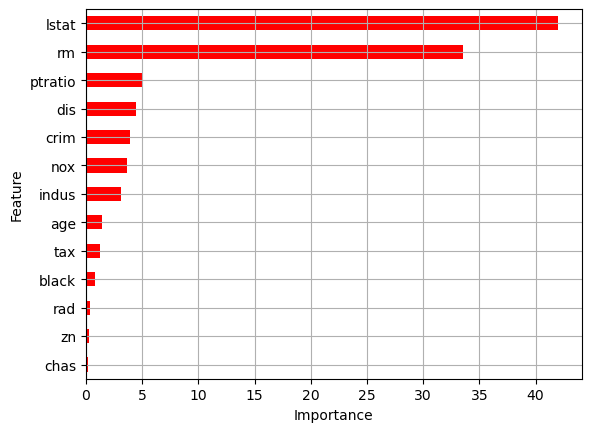

In [39]:
Importance = pd.DataFrame({'Importance':RF_best_model.feature_importances_*100},
                          index = X.columns)
df8 = Importance.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df8.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

Same best features as with bagging. The wealth level of the community ('lstat') and the house size ('rm')
are the two most important predictors

# Gradient Boosting

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=0)

### learning_rate to 0.10

In [41]:
boost10 = GradientBoostingRegressor(n_estimators = 500, 
                                    learning_rate = 0.1,
                                    max_depth = 4, 
                                    random_state =1)
boost10.fit(X_train,y_train)
mean_squared_error(y_test,boost10.predict(X_test))

17.14218723022166

### learning_rate to 0.40

In [42]:
boost40 = GradientBoostingRegressor(n_estimators = 500,
                                    learning_rate = 0.40,
                                    max_depth = 4, 
                                    random_state=1)
boost40.fit(X_train,y_train)
mean_squared_error(y_test,boost40.predict(X_test))

16.580039404288993

### GridSearchCV on GB learning_rate

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=0)

In [44]:
lrates = np.linspace(0.01,1,20)
lrates

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [45]:
params = dict(learning_rate = lrates)
params

{'learning_rate': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
        0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
        0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
        0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])}

In [46]:
model = GradientBoostingRegressor(n_estimators = 500,
                                  max_depth = 4, 
                                  random_state=1)

In [47]:
grid1 = GridSearchCV(model,param_grid = params,
                    scoring = 'neg_mean_squared_error',cv = 5)
grid1.fit(X_train,y_train);

In [48]:
grid1.best_params_

{'learning_rate': 0.11421052631578947}

In [49]:
-grid1.score(X_test,y_test)

17.525614916769054

In [50]:
# Refine params values

lrates = np.linspace(0.05,0.15,20)
params = dict(learning_rate = lrates)
lrates

array([0.05      , 0.05526316, 0.06052632, 0.06578947, 0.07105263,
       0.07631579, 0.08157895, 0.08684211, 0.09210526, 0.09736842,
       0.10263158, 0.10789474, 0.11315789, 0.11842105, 0.12368421,
       0.12894737, 0.13421053, 0.13947368, 0.14473684, 0.15      ])

In [51]:
grid2 = GridSearchCV(model,param_grid = params,
                    scoring = 'neg_mean_squared_error',cv = 5)
grid2.fit(X_train,y_train);

In [52]:
grid2.best_params_

{'learning_rate': 0.10263157894736842}

In [53]:
-grid2.score(X_test,y_test)

16.879372503369037

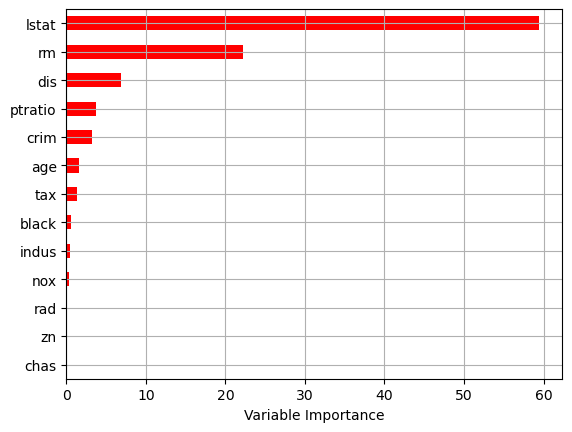

In [54]:
Importance2 = grid2.best_estimator_.feature_importances_*100
Importance2 = pd.DataFrame({'Importance':Importance2},index = X.columns)
df9 = Importance2.sort_values(by = 'Importance',axis = 0,ascending = True)
df9.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

### GridSearchCV on learning_rate and max_features

In [55]:
# Consider 6 values for each parameter
params = {'learning_rate': np.linspace(0.01,1,6),
              'max_features': list(range(3,9))}
params

{'learning_rate': array([0.01 , 0.208, 0.406, 0.604, 0.802, 1.   ]),
 'max_features': [3, 4, 5, 6, 7, 8]}

In [56]:
model = GradientBoostingRegressor(n_estimators = 500,
                                  max_depth = 4, 
                                  random_state=1)

In [57]:
grid1 = GridSearchCV(model,param_grid = params,
                    scoring = 'neg_mean_squared_error',cv = 5)
grid1.fit(X_train,y_train);

In [58]:
grid1.best_params_

{'learning_rate': 0.20800000000000002, 'max_features': 6}

In [59]:
df1 = pd.DataFrame(grid1.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099172,0.005869,0.001014,0.000088,0.01,3,"{'learning_rate': 0.01, 'max_features': 3}",-7.610273,-7.219737,-19.538940,-15.050501,-8.659483,-11.615787,4.872017,6
1,0.110232,0.000358,0.000960,0.000012,0.01,4,"{'learning_rate': 0.01, 'max_features': 4}",-7.708159,-6.622963,-21.477524,-13.002760,-8.364986,-11.435279,5.473211,3
2,0.125904,0.000559,0.000951,0.000009,0.01,5,"{'learning_rate': 0.01, 'max_features': 5}",-8.170496,-6.562454,-19.708259,-13.105675,-8.252056,-11.159788,4.803937,2
3,0.141992,0.000548,0.000944,0.000007,0.01,6,"{'learning_rate': 0.01, 'max_features': 6}",-8.441384,-6.735156,-20.975003,-13.388623,-8.241567,-11.556346,5.215419,4
4,0.157449,0.000693,0.000936,0.000012,0.01,7,"{'learning_rate': 0.01, 'max_features': 7}",-8.525926,-6.441028,-22.558258,-13.630800,-8.303440,-11.891890,5.843181,7
5,0.173441,0.000995,0.000929,0.000012,0.01,8,"{'learning_rate': 0.01, 'max_features': 8}",-8.885766,-6.780975,-24.298762,-12.824106,-8.527026,-12.263327,6.333880,9
6,0.094076,0.000422,0.000887,0.000011,0.208,3,"{'learning_rate': 0.20800000000000002, 'max_fe...",-8.141103,-7.418348,-26.203440,-11.038359,-9.087564,-12.377763,7.018744,11
7,0.109735,0.000415,0.000877,0.000012,0.208,4,"{'learning_rate': 0.20800000000000002, 'max_fe...",-7.453510,-7.635276,-32.294182,-10.132872,-9.154800,-13.334128,9.531601,13
8,0.125776,0.000464,0.000877,0.000017,0.208,5,"{'learning_rate': 0.20800000000000002, 'max_fe...",-9.422320,-7.553995,-22.471541,-13.906707,-7.841920,-12.239297,5.598275,8
9,0.141585,0.000616,0.000862,0.000013,0.208,6,"{'learning_rate': 0.20800000000000002, 'max_fe...",-7.663548,-7.526131,-24.833706,-7.775358,-7.553339,-11.070416,6.882211,1


In [60]:
df2 = df1.iloc[:,[4,5,12]].copy()
df2.mean_test_score = -df2.mean_test_score
df2[:9]

,param_learning_rate,param_max_features,mean_test_score
0,0.01,3,11.615787
1,0.01,4,11.435279
2,0.01,5,11.159788
3,0.01,6,11.556346
4,0.01,7,11.891890
5,0.01,8,12.263327
6,0.208,3,12.377763
7,0.208,4,13.334128
8,0.208,5,12.239297


In [61]:
df2[-9:]

,param_learning_rate,param_max_features,mean_test_score
27,0.802,6,14.094091
28,0.802,7,20.887565
29,0.802,8,19.463552
30,1.0,3,37.093306
31,1.0,4,46.481536
32,1.0,5,41.303353
33,1.0,6,19.580221
34,1.0,7,29.236760
35,1.0,8,25.724720


In [62]:
df2.param_learning_rate = df2.param_learning_rate.astype('float64')
df2.param_learning_rate = df2.param_learning_rate.round(3)

In [63]:
df2 = df2.pivot_table('mean_test_score',
                      columns = 'param_learning_rate',
                      index = 'param_max_features')
df2

param_learning_rate,0.010,0.208,0.406,0.604,0.802,1.000
param_max_features,,,,,,
3,11.615787,12.377763,17.180822,20.829473,30.899405,37.093306
4,11.435279,13.334128,16.238018,24.198933,31.339964,46.481536
5,11.159788,12.239297,18.045442,24.659544,34.942586,41.303353
6,11.556346,11.070416,11.565877,13.408052,14.094091,19.580221
7,11.891890,12.363371,13.125690,17.740055,20.887565,29.236760
8,12.263327,13.577059,13.556925,15.655501,19.463552,25.724720


In [64]:
# transform dataframe to numpy array
arates = df2.values
arates = np.round(arates,3)
arates

array([[11.616, 12.378, 17.181, 20.829, 30.899, 37.093],
       [11.435, 13.334, 16.238, 24.199, 31.34 , 46.482],
       [11.16 , 12.239, 18.045, 24.66 , 34.943, 41.303],
       [11.556, 11.07 , 11.566, 13.408, 14.094, 19.58 ],
       [11.892, 12.363, 13.126, 17.74 , 20.888, 29.237],
       [12.263, 13.577, 13.557, 15.656, 19.464, 25.725]])

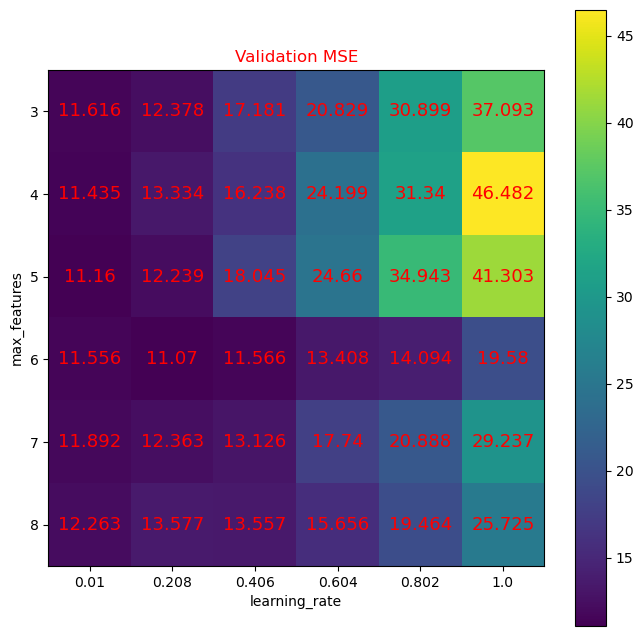

In [65]:
plt.figure(figsize=(8,8))
plt.xticks(range(6),df2.columns)
plt.yticks(range(6),df2.index)
plt.ylabel('max_features')
plt.xlabel('learning_rate')
plt.title('Validation MSE',c='r')
plt.imshow(arates)
for i in range(6):
    for j in range(6):
        text = plt.text(j,i,arates[i,j],
                        ha="center",
                        va="center",
                        color="r",
                        size = 13)
plt.colorbar();

### Test MSE

In [66]:
model = GradientBoostingRegressor(n_estimators = 500,
                                  max_features = 6,
                                  max_depth = 4,
                learning_rate = 0.20800000000000002,
                                  random_state=1)
model.fit(X_train,y_train)
pred2 = model.predict(X_test)
mean_squared_error(y_test,pred2)

15.688938784290462

In [67]:
-grid1.score(X_test,y_test)

15.688938784290462

In [68]:
model = GradientBoostingRegressor(n_estimators = 500,
                                  max_features = 6,
                                  max_depth = 4,
                                  learning_rate = 0.208,
                                  random_state=1)
model.fit(X_train,y_train)
pred2 = model.predict(X_test)
mean_squared_error(y_test,pred2)

15.127755055051313